In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import timedelta
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from datetime import datetime
import textwrap
import math
import time
import warnings
warnings.filterwarnings('ignore')
%cd /content/drive/MyDrive/Code

[Errno 2] No such file or directory: '/content/drive/MyDrive/Code'
/content


In [ ]:
users_df = pd.read_csv('users.dat', sep='::', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies_feat_df = pd.read_csv('movies.dat', sep='::', header=None, names=['MovieID', 'Title','Genres'])
interacts_df = pd.read_csv('ratings.dat', sep='::', names=['UserID', 'MovieID', 'Rating', 'Timestamp']).sort_values("Timestamp") 

In [ ]:
print(users_df.info())
users_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
None


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
print(movies_feat_df.info())
movies_feat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print(interacts_df.info())
interacts_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1000138 to 825603
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 38.2 MB
None


,UserID,MovieID,Rating,Timestamp
1000138,6040,858,4,956703932
1000153,6040,2384,4,956703954
999873,6040,593,5,956703954
1000007,6040,1961,4,956703977
1000192,6040,2019,5,956703977


In [ ]:
print("Users: ", users_df.shape, "\n")
print("Movies: ", movies_feat_df.shape, "\n")
print("interacts_df: ", interacts_df.shape, "\n")

Users:  (6040, 5) 

Movies:  (3883, 3) 

interacts_df:  (1000209, 4) 



In [ ]:
print("Users: ", users_df.columns, "\n")
print("Movies: ", movies_feat_df.columns, "\n")
print("interacts_df: ", interacts_df.columns, "\n")

Users:  Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object') 

Movies:  Index(['MovieID', 'Title', 'Genres'], dtype='object') 

interacts_df:  Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object') 



In [ ]:
print(interacts_df['Rating'].value_counts())
print("====================================")
print(interacts_df['Rating'].describe())

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64
count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


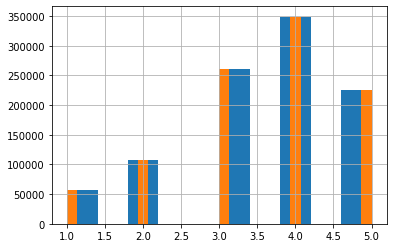

In [ ]:
interacts_df['Rating'].hist(bins=10)
interacts_df['Rating'].hist(bins=30)

In [ ]:
print(interacts_df['UserID'].value_counts())
print("====================================")
print(interacts_df['UserID'].describe())

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
761       20
1493      20
5533      20
2714      20
2696      20
Name: UserID, Length: 6040, dtype: int64
count    1.000209e+06
mean     3.024512e+03
std      1.728413e+03
min      1.000000e+00
25%      1.506000e+03
50%      3.070000e+03
75%      4.476000e+03
max      6.040000e+03
Name: UserID, dtype: float64


Build the item features (movie generes) - one-hot coded


In [ ]:
genere_dummies = movies_feat_df['Genres'].str.get_dummies()
item_feat_df = (pd.concat([movies_feat_df, genere_dummies], axis=1).drop(["Genres","Title"], axis=1))
item_feat_df = item_feat_df.rename(columns = {"Children's": 'Childrens','Film-Noir': 'Film_Noir','Sci-Fi': 'Sci_Fi'})
print(item_feat_df.info())
item_feat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MovieID      3883 non-null   int64
 1   Action       3883 non-null   int64
 2   Adventure    3883 non-null   int64
 3   Animation    3883 non-null   int64
 4   Childrens    3883 non-null   int64
 5   Comedy       3883 non-null   int64
 6   Crime        3883 non-null   int64
 7   Documentary  3883 non-null   int64
 8   Drama        3883 non-null   int64
 9   Fantasy      3883 non-null   int64
 10  Film_Noir    3883 non-null   int64
 11  Horror       3883 non-null   int64
 12  Musical      3883 non-null   int64
 13  Mystery      3883 non-null   int64
 14  Romance      3883 non-null   int64
 15  Sci_Fi       3883 non-null   int64
 16  Thriller     3883 non-null   int64
 17  War          3883 non-null   int64
 18  Western      3883 non-null   int64
dtypes: int64(19)
memory usage: 576.5 KB
None


,MovieID,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_gender_df = users_df[['UserID', 'Gender']]
gen_dummies = user_gender_df['Gender'].str.get_dummies()
user_feat_df = (pd.concat([user_gender_df, gen_dummies], axis=1).drop(["Gender"], axis=1))


In [ ]:
interacts_df.sort_values(by='Timestamp')
interacts_df['Timestamp'] = interacts_df.Timestamp.apply(lambda x: datetime.fromtimestamp(x / 1e3))

In [ ]:
print(user_feat_df.info())
user_feat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UserID  6040 non-null   int64
 1   F       6040 non-null   int64
 2   M       6040 non-null   int64
dtypes: int64(3)
memory usage: 141.7 KB
None


,UserID,F,M
0,1,1,0
1,2,0,1
2,3,0,1
3,4,0,1
4,5,0,1


In [ ]:
print(interacts_df.info())
interacts_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 1000138 to 825603
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 38.2 MB
None


,UserID,MovieID,Rating,Timestamp
1000138,6040,858,4,1970-01-12 01:45:03.932
1000153,6040,2384,4,1970-01-12 01:45:03.954
999873,6040,593,5,1970-01-12 01:45:03.954
1000007,6040,1961,4,1970-01-12 01:45:03.977
1000192,6040,2019,5,1970-01-12 01:45:03.977


In [ ]:
print(movies_feat_df.info())
movies_feat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Number of users:

In [ ]:
print("Number of users -->", interacts_df['UserID'].nunique())

Number of users --> 6040


Number of movies:

In [ ]:
print("Number of movies -->", interacts_df['MovieID'].nunique())

Number of movies --> 3706


In [ ]:
full_data = pd.merge(user_feat_df, interacts_df, how="left", on="UserID")
full_data = pd.merge(full_data, movies_feat_df, how='left', on="MovieID")
full_data.head()

,UserID,F,M,MovieID,Rating,Timestamp,Title,Genres
0,1,1,0,3186,4,1970-01-12 07:45:00.019,"Girl, Interrupted (1999)",Drama
1,1,1,0,1721,4,1970-01-12 07:45:00.055,Titanic (1997),Drama|Romance
2,1,1,0,1270,5,1970-01-12 07:45:00.055,Back to the Future (1985),Comedy|Sci-Fi
3,1,1,0,1022,5,1970-01-12 07:45:00.055,Cinderella (1950),Animation|Children's|Musical
4,1,1,0,2340,3,1970-01-12 07:45:00.103,Meet Joe Black (1998),Romance


Top 10 most rated movies:

In [ ]:
top_ten_movies = full_data.groupby('Title').size().sort_values(ascending=False)[:10]
top_ten_movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
dtype: int64

In [ ]:
full_data[full_data.Title == 'Star Wars: Episode IV - A New Hope (1977)']['Genres'].iloc[0]

'Action|Adventure|Fantasy|Sci-Fi'

Top 10 least rated movies:

In [ ]:
least_ten_movies = full_data.groupby('Title').size().sort_values(ascending=False)[-10:]
least_ten_movies

Title
Open Season (1996)                                                       1
Waltzes from Vienna (1933)                                               1
Tashunga (1995)                                                          1
Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)    1
Target (1995)                                                            1
Anna (1996)                                                              1
McCullochs, The (1975)                                                   1
Shadows (Cienie) (1988)                                                  1
Night Tide (1961)                                                        1
Another Man's Poison (1952)                                              1
dtype: int64

In [ ]:
movies_feat_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
movies_ratings = interacts_df.set_index('MovieID').join(movies_feat_df.set_index('MovieID'), how='left')
movies_ratings.head()

,UserID,Rating,Timestamp,Title,Genres
MovieID,,,,,
1,6035,4,1970-01-12 01:45:12.849,Toy Story (1995),Animation|Children's|Comedy
1,6032,4,1970-01-12 01:45:18.127,Toy Story (1995),Animation|Children's|Comedy
1,6022,5,1970-01-12 01:45:55.763,Toy Story (1995),Animation|Children's|Comedy
1,6021,3,1970-01-12 01:45:57.147,Toy Story (1995),Animation|Children's|Comedy
1,6016,4,1970-01-12 01:46:18.750,Toy Story (1995),Animation|Children's|Comedy


In [ ]:
 dummies = movies_feat_df['Genres'].str.get_dummies()

In [ ]:
movies_ratings

,UserID,Rating,Timestamp,Title,Genres
MovieID,,,,,
1,6035,4,1970-01-12 01:45:12.849,Toy Story (1995),Animation|Children's|Comedy
1,6032,4,1970-01-12 01:45:18.127,Toy Story (1995),Animation|Children's|Comedy
1,6022,5,1970-01-12 01:45:55.763,Toy Story (1995),Animation|Children's|Comedy
1,6021,3,1970-01-12 01:45:57.147,Toy Story (1995),Animation|Children's|Comedy
1,6016,4,1970-01-12 01:46:18.750,Toy Story (1995),Animation|Children's|Comedy
...,...,...,...,...,...
3952,1794,1,1970-01-13 00:58:11.618,"Contender, The (2000)",Drama|Thriller
3952,1203,5,1970-01-13 01:03:35.580,"Contender, The (2000)",Drama|Thriller
3952,2031,3,1970-01-13 01:32:26.930,"Contender, The (2000)",Drama|Thriller


In [ ]:
cleaned_movies_ratings = pd.concat([movies_ratings, dummies], axis=0)
cleaned_movies_ratings

,UserID,Rating,Timestamp,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,6035.0,4.0,1970-01-12 01:45:12.849,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6032.0,4.0,1970-01-12 01:45:18.127,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6022.0,5.0,1970-01-12 01:45:55.763,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6021.0,3.0,1970-01-12 01:45:57.147,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6016.0,4.0,1970-01-12 01:46:18.750,Toy Story (1995),Animation|Children's|Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3881,NaN,NaN,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
full_df = pd.merge(pd.merge(interacts_df, users_df), movies_feat_df)
full_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,6040,858,4,1970-01-12 01:45:03.932,M,25,6,11106,"Godfather, The (1972)",Action|Crime|Drama
1,6039,858,4,1970-01-12 01:45:57.973,F,45,0,01060,"Godfather, The (1972)",Action|Crime|Drama
2,6037,858,5,1970-01-12 01:45:09.118,F,45,1,76006,"Godfather, The (1972)",Action|Crime|Drama
3,6033,858,4,1970-01-12 01:45:13.838,M,50,13,78232,"Godfather, The (1972)",Action|Crime|Drama
4,6028,858,4,1970-01-12 01:45:23.393,M,18,4,94133,"Godfather, The (1972)",Action|Crime|Drama


Calculate mean movie ratings for each film by gender:

In [ ]:
mean_ratings = full_df.pivot_table('Rating', index='Title', columns='Gender', aggfunc='mean')
mean_ratings.head()

Gender,F,M
Title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [ ]:
ratings_by_movie_title = full_df.groupby('Title').size()
ratings_by_movie_title[:10]

Title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [ ]:
mean_ratings = mean_ratings.iloc[ratings_by_movie_title]
mean_ratings.head()

Gender,F,M
Title,,
"Abominable Snowman, The (1957)",2.00000,2.750000
Afterglow (1997),3.12500,3.095238
"Addams Family, The (1991)",3.18617,3.163498
Batman Returns (1992),2.98010,2.975904
"Apple, The (Sib) (1998)",4.75000,4.600000


In [ ]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

Gender,F,M
Title,,
24 7: Twenty Four Seven (1997),5.0,3.750000
24 7: Twenty Four Seven (1997),5.0,3.750000
24 7: Twenty Four Seven (1997),5.0,3.750000
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
24 7: Twenty Four Seven (1997),5.0,3.750000
"Big Combo, The (1955)",5.0,3.600000
Country Life (1994),5.0,2.000000
24 7: Twenty Four Seven (1997),5.0,3.750000
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571


In [ ]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

Gender,F,M
Title,,
"Bells, The (1926)",4.000,5.000000
Angela (1995),3.000,5.000000
Angela (1995),3.000,5.000000
"Baby, The (1973)",NaN,5.000000
Angela (1995),3.000,5.000000
"Gate of Heavenly Peace, The (1995)",5.000,5.000000
"Baby, The (1973)",NaN,5.000000
Sanjuro (1962),4.375,4.639344
"Apple, The (Sib) (1998)",4.750,4.600000
